<a href="https://colab.research.google.com/github/yunatseng/ML100-Days/blob/main/Day_046_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [ ]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
digits = datasets.load_digits()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits.data.shape # 先看一下資料集的大小

(1797, 64)

- `digits.data.shape` 返回 `digits` 資料集中的資料矩陣（data）的形狀（shape）。
- 其中，digits.data 是一個二維數組，形狀為 (1797, 64)，表示該資料集中共有 `1797` 張圖片，每張圖片都被壓縮成了一個 `8x8` 的像素矩陣，因此每個圖片都被表示成了一個長度為 `64` 的一維數組。
- 因此，digits.data.shape 的返回值為 (1797, 64)，這意味著資料集中有 1797 張圖片，每個圖片用一個長度為 64 的一維數組來表示。

In [ ]:
np.max(pixel_values) # 是一個浮點數 

16.0

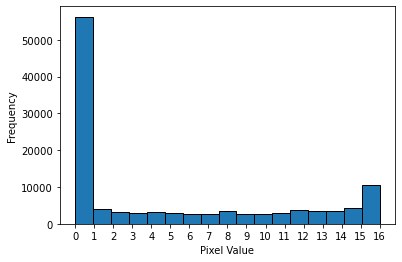

In [ ]:
# 看一下 feature 的分佈狀況
data = digits.data
pixel_values = data.ravel()

bin_size =  int(np.max(pixel_values)) + 1  
plt.hist(pixel_values, bins=bin_size, edgecolor='black')
plt.xticks(np.arange(0, bin_size))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

#### 從圖中得知 pixel 範圍最大只有到 16 而不是 255 => 看起來做過了壓縮 @@?

In [ ]:
digits.data[0]
digits.data[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

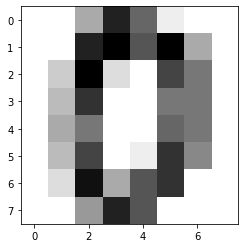

In [ ]:
# 畫畫看第一個樣本
image = data[0].reshape((8, 8))  # 將一維 array 轉成二維
image
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 42)

clf = GradientBoostingClassifier(random_state = 42)

clf.fit(x_train, y_train) ## 產生訓練模型

y_pred = clf.predict(x_test)

In [ ]:
print(f'train accuracy: {metrics.accuracy_score(clf.predict(x_train), y_train)}')
print(f'test accuracy: {metrics.accuracy_score(y_pred, y_test)}')

train accuracy: 1.0
test accuracy: 0.9694444444444444


In [ ]:
score = clf.score(x_test, y_test)
score

0.9694444444444444

In [ ]:
# 隨機選擇一個測試樣本進行預測和視覺化
index = np.random.randint(len(x_test))
image = x_test[index].reshape((8, 8))
pred = y_pred[index]

In [ ]:
pred

0

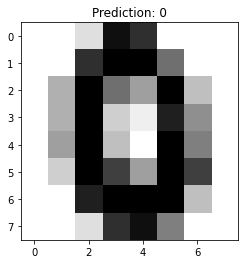

In [ ]:
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Prediction: %d" % pred)
plt.show()

答對了！^_^~